# Ceneo Analyzer

1. Wyświetlenie listy kodów produktów, o których zostały pobrane opinie
2. Pobranie od użytkownika kodu produktu, którego statystki mają być policzone
3. Wczytanie z pliku JSON opinii o produkcie, którego statystki mają być policzone
4. Policzenie podstawowych statystyk
5. Przygotowanie wykresów:
    - histogram częstości ocen produktu
    - wykres udziału rekomendacji w opiniach


1. Import bibliotek

In [8]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

2. Wyświetlenie listy kodów produktów, o których zostały pobrane opinie

In [10]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

36068712
37089065
49729622
61161229
92504536


3. Pobranie od użytkownika kodu produktu, którego statystki mają być policzone

In [11]:
product_code = input("Podaj kod produktu: ")

4. Wczytanie z pliku JSON opinii o produkcie, którego statystki mają być policzone

In [26]:
opinions = pd.read_json(f"opinions/{product_code}.json")
opinions.stars = opinions.stars.apply(lambda s: s.split('/')[0].replace(',', '.')).astype(float)

5. Policzenie podstawowych statystyk

In [29]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
avarage_stars = opinions.stars.mean()

6. Histogram częstości ocen produktu

In [ ]:
stars_distr = opinions.stars.value_counts().reindex(np.arange(0,5.5,0.5), fill_value=0)
stars_distr.plot.bar(color='darkblue')
plt.title(f"Histogram częstości ocen produktu {product_code}")
plt.xlabel("liczba gwiazdek")
plt.ylabel("liczba opinii")
plt.xticks(rotation=0)

7. Wykres udziału rekomendacji w opiniach

Text(0, 0.5, '')

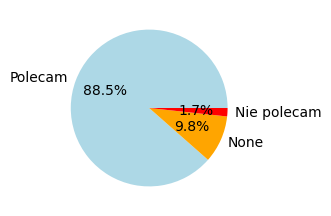

In [76]:
recommendations = opinions.recommendation.value_counts(dropna = False)
recommendations.plot.pie(autopct='%1.1f%%', colors=["lightblue", "orange", "red"])
plt.ylabel("")

In [39]:
opinions

,opinion_id,author,recommendation,stars,content,pros,cons,post_date,purchase_date,useful,useless
0,15005859,a...7,Polecam,4.0,Dobra drukarka jak na tą cenę. Aplikacja do dr...,"[cena, jakość wydruku, szybkość wydruku]",[głośność pracy],2021-09-28 17:05:40,2021-07-13 10:44:47,3,0
1,14933593,z...w,Polecam,5.0,Produkt wart swojej ceny. Bardzo dobry stosune...,"[cena, głośność pracy, jakość wydruku, szybkoś...",[],2021-09-08 12:53:41,2020-03-01 20:59:22,0,0
2,14911521,Przemek,Polecam,4.5,Bardzo przyjemna drukarka wi-fi kiedy się już ...,"[cena, głośność pracy, jakość wydruku, szybkoś...",[],2021-09-01 21:35:52,2021-08-08 11:22:53,1,0
3,13278019,Jacek,Polecam,5.0,"Mała, szybka drukarka, dobra jakość druku, świ...","[cena, jakość / cena, jakość wydruku, kompakto...",[],2020-10-27 10:50:45,2020-10-17 15:29:21,5,0
4,16133710,b...o,Polecam,4.5,Jak ktoś nie ma routera z WPS a do tego jeszcz...,"[6 latka zaczęła drukować po 5 minutach, bardz...","[banalna instalacja, głośność pracy, łatwość i...",2022-05-26 14:41:55,2022-05-20 11:01:13,0,0
...,...,...,...,...,...,...,...,...,...,...,...
169,6393687,Użytkownik Ceneo,None,4.5,"4,5/5",[],[],2017-12-26 21:59:17,None,0,0
170,6311651,Użytkownik Ceneo,None,5.0,"5,0/5",[],[],2017-12-08 12:07:29,2017-12-05 15:12:28,0,0
171,6280668,Użytkownik Ceneo,None,4.5,"4,5/5",[],[],2017-12-01 14:37:19,2017-11-14 17:04:34,0,0
172,5129804,Użytkownik Ceneo,None,5.0,"5,0/5",[],[],2017-10-16 11:01:39,2017-10-11 16:24:04,0,0
